In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("supermarket_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  Rating         1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


#### Question 1: Example

In [3]:
### how many purchases (rows in the table, not 'Quantity') were done by Male and Female customers?

#### Question 1 - solution: Example

In [4]:
m_amount = len(df[df['Gender'] == 'Male'])
f_amount = len(df[df['Gender'] == 'Female'])

# do not print any intermediate results
# print *only your final* result in the form of a data frame (for clarity)

result = [('purchases by male', m_amount), ('purchases by female', f_amount)]
pd.DataFrame(result)

,0,1
0,purchases by male,498
1,purchases by female,502


#### Question 2

In [5]:
### what is the average Rating for products in the "Health and beauty" Product line?
temp = df[df['Product line'] == 'Health and beauty']['Rating']
count = len(temp)
summation = sum(temp)
avg = summation / count
result = [('Average rating of product in Health and beauty', avg)]
pd.DataFrame(result)

,0,1
0,Average rating of product in Health and beauty,7.003289


#### Question 3

In [6]:
### how many products in each Product line were sold during the first week (days 1-7 including) of March 2019?
### use the 'Quantity' column for that purpose - the number of products purchased
products=df['Product line'].unique()
pairs = list()
for product in products:
    amount = len(df[(df['Date'] >= '1-3-2019') & (df['Date'] < '7-3-2019') & (df['Product line'] == product)])
    pairs.append((product, amount))

result = pd.DataFrame(pairs)
result

,0,1
0,Electronic accessories,106
1,Fashion accessories,105
2,Food and beverages,103
3,Health and beauty,91
4,Home and lifestyle,85
5,Sports and travel,97


#### Question 4

<AxesSubplot:xlabel='0'>

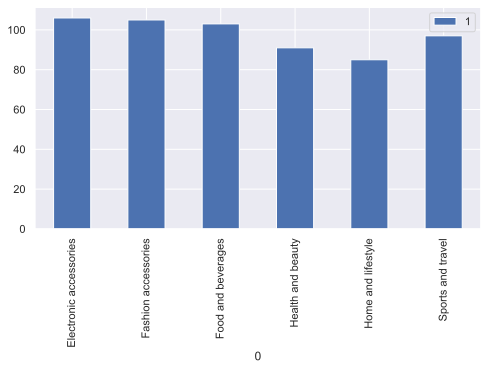

In [7]:
### plot a bar chart showing the number of products per category computed in the previous question
result.plot.bar(x=0, y=1)

#### Question 5

(0.0, 140.0)

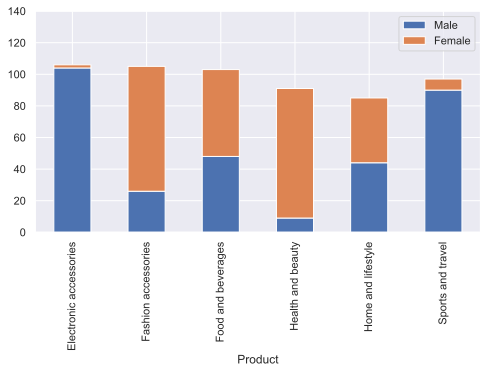

In [8]:
### plot the same bar chart as above - split by gender (male, female)
### the split bar chart is called stacked bar: look up "plot stacked bar charts from a dataframe" to see how to plot it
products=df['Product line'].unique()
genders = ['Male', 'Female']
triplets = list()
for product in products:
    triplet = [product]
    for gender in genders: 
        amount = len(df[(df['Date'] >= '1-3-2019') & (df['Date'] < '7-3-2019') & (df['Product line'] == product) &(df['Gender']==gender)])
        triplet.append(amount)
    triplets.append(triplet)
    
result = pd.DataFrame(triplets, columns=['Product', *genders])
result.plot.bar(x=0, stacked=True).set_ylim(0,140)

#### Question 6

In [9]:
### what is the total sales ('Total') done by each Payment type during the whole period?
### use the full data in the dataset (not the first week of March) from now on
payment_types=df['Payment'].unique()
pairs=list()
for payment in payment_types:
    total_sales = len(df[df['Payment']==payment]['Total'])
    pairs.append((payment,total_sales))
pd.DataFrame(pairs)

,0,1
0,Credit card,311
1,Cash,344
2,Ewallet,345


#### Question 7

<AxesSubplot:xlabel='Week'>

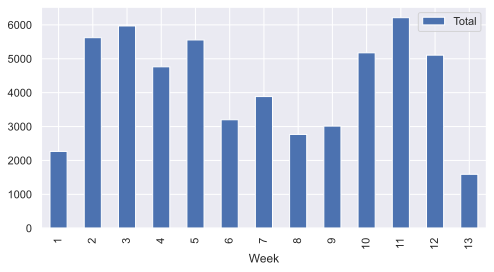

In [10]:
### plot a chart with total sales ('Total') of the "Sports and travel" products by calendar week (Monday-Sunday): 
### note the first and the last week can be incomplete (for instance, the data starts on Wednesday, and ends on Friday)
### assume all our sales data spans the same year (for instance, 2019)

### you can make use of the isocalendar() function: https://www.geeksforgeeks.org/isocalendar-function-of-datetime-date-class-in-python/

### x axis are weeks enumerated from the first to the last calendar week in the data
### y axis is the total sales that week
import numpy as np
from datetime import datetime

date_format = "%m/%d/%Y"

df1 = df[df['Product line']=='Sports and travel']
df1 = df1[['Date', 'Total']]
df1['Week']=df1['Date'].apply(lambda x: datetime.strptime(x, date_format).isocalendar()[1])

sum_per_week = list()
week_numbers = np.sort(df1['Week'].unique())
for week in week_numbers:
    sum_of_week = sum(df1[df1['Week']==week]['Total'])
    sum_per_week.append((week, sum_of_week))

result = pd.DataFrame(sum_per_week, columns=['Week', 'Total'])
result.plot.bar(x=0)

#### Question 8

C:\Users\omere\AppData\Local\Temp\ipykernel_25484\2889411715.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Hour']=df1['Time'].apply(lambda x: int(x.split(':')[0]))


<AxesSubplot:xlabel='Hour'>

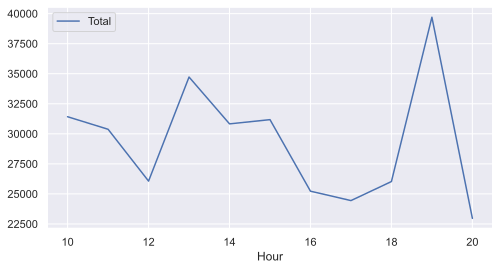

In [16]:
### plot a line chart of total sales ('Total') per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total amount of sales during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)
df1 = df[['Time', 'Total']]
df1['Hour']=df1['Time'].apply(lambda x: int(x.split(':')[0]))
hours = np.sort(df1['Hour'].unique())
sum_per_hour = list()
for hour in hours:
    sum_of_hour = sum(df1[df1['Hour']==hour]['Total'])
    sum_per_hour.append((hour, sum_of_hour))

result = pd.DataFrame(sum_per_hour, columns=['Hour', 'Total'])
result.plot.line(x=0)

#### Question 9

C:\Users\omere\AppData\Local\Temp\ipykernel_25484\3315616921.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Hour']=df1['Time'].apply(lambda x: int(x.split(':')[0]))


<AxesSubplot:xlabel='Hour'>

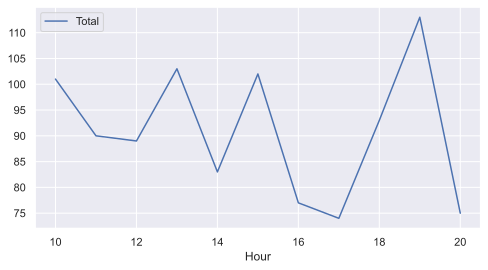

In [17]:
### plot a line chart of the total number of purchases (rows) per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total number of purchases during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)
df1 = df[['Time', 'Total']]
df1['Hour']=df1['Time'].apply(lambda x: int(x.split(':')[0]))
hours = np.sort(df1['Hour'].unique())
sum_per_hour = list()
for hour in hours:
    sum_of_hour = len(df1[df1['Hour']==hour])
    sum_per_hour.append((hour, sum_of_hour))

result = pd.DataFrame(sum_per_hour, columns=['Hour', 'Total'])
result.plot.line(x=0)

#### Question 10

In [13]:
### what is the total income of strategic products by City?

### for each strategic product (as detailed in the product_types_strategy.csv file), 
###    display break down of total sales by cities - a table with three columns: 
###    (1) product line, (2) city and (3) total sales for that line in the city

In [20]:
strategic_df = pd.read_csv("product_types_strategy.csv")
triplets = list()
strategic = strategic_df[strategic_df['strategic']=='yes']['Product type'].unique()
for product in strategic:
    cities = df[df['Product line']==product]['City'].unique()
    for city in cities:
        total_sales = sum(df[(df['Product line']==product) & (df['City']==city)]['Total'])
        triplets.append((product, city, total_sales))

result = pd.DataFrame(triplets, columns=['Product', 'City', 'Total'])
result

,Product,City,Total
0,Health and beauty,Naypyitaw,16615.3260
1,Health and beauty,Yangon,12597.7530
2,Health and beauty,Mandalay,19980.6600
3,Electronic accessories,Yangon,18317.1135
4,Electronic accessories,Naypyitaw,18968.9745
5,Electronic accessories,Mandalay,17051.4435
6,Sports and travel,Yangon,19372.6995
7,Sports and travel,Naypyitaw,15761.9280
8,Sports and travel,Mandalay,19988.1990
9,Food and beverages,Mandalay,15214.8885
